# measuring radial velocity after creation
Tim Tyree<br>
4.25.2024

In [1]:
import sys,os
og_stdout=sys.stdout
from lib.my_initialization import *
os.chdir(nb_dir)
from lib import *
# import cupy, cudf
# from lib.rapids_func import *
import seaborn as sns
import matplotlib.ticker as mtick
import warnings
warnings.simplefilter("ignore", UserWarning)
%load_ext autoreload
%autoreload 2

In [2]:
import seaborn as sns
#reset matplotlib
plt.plot([1]*4)
plt.close()
#reset matplotlib settings
import matplotlib as mpl
sns.reset_orig()
mpl.rc_file_defaults()

# define module

# load creation ranges and average conditioned on time after creation

In [29]:
range_data_dir_fk = "/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_creation_range_timeseries.pkl"
# range_data_dir_fk = "/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_annihilation_range_timeseries.pkl"
#LR 200x200
# range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/tippos_per_001_creation_range_timeseries.pkl'
range_data_dir_lr='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_creation_range_timeseries.pkl'
# range_data_dir='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_annihilation_range_timeseries.pkl'
os.path.exists(range_data_dir_fk),os.path.exists(range_data_dir_lr)

(True, True)

In [30]:
data = load_from_pickle(range_data_dir_lr)
min_samples=10
# min_samples=100
mintmax=1.
# mintmax=4.
# mintmax=100.
# mintmax=200.  #looks sharper for lr
mintmax=50.  #looks sharper for lr
printing=True
tR_values_lst=[]
dict_lst=[]
nsteps=len(data)
for trial_num in range(nsteps):
    df = data[trial_num].rename(columns={'annihilation_index':'creation_index',
                            'tdeath':'tbirth'
                   })
    if df.shape[0]>0:
        groups = df.groupby(by='creation_index')
        for creation_index,g in groups:
            r0 = g.iloc[0]['R']
            n_prev = int(g.iloc[0]['n']) - 2
            tR_values = g[['tbirth','R',]].values
            tmax = tR_values[:,0].max()
            if tmax >= mintmax:
                #record
                tR_values_lst.append(pd.DataFrame(tR_values).rename(columns={0:'t',1:'R'}))
                dict_lst.append(dict(
                    trial_num=trial_num,
                    creation_index=creation_index,
                    r0=r0,
                    n_prev=n_prev,
                ))
        if printing:
            printProgressBar(trial_num+1,nsteps)
if printing:
    printProgressBar(nsteps,nsteps)

df_r0_lr = pd.DataFrame(dict_lst)

# df_r0['r0'].mean(),df_r0.shape[0]
dict_lst=[]
for t,gR in pd.concat(tR_values_lst).groupby(by='t'):
    R_values = gR['R'].values
    if R_values.shape[0]>=min_samples:
        meanR,Delta_meanR,num_obs,p_normal=comp_mean_bootstrap_uncertainty(R_values,num_samples=1000)
        #record
        dict_lst.append(dict(t=t,meanR=meanR,Delta_meanR=Delta_meanR,p_normal=p_normal,num_obs=num_obs))
df_R_lr = pd.DataFrame(dict_lst)

In [31]:
data = load_from_pickle(range_data_dir_fk)
min_samples=100
mintmax=4.
# mintmax=100.
mintmax=200.  #looks sharper for lr
printing=True
tR_values_lst=[]
dict_lst=[]
nsteps=len(data)
for trial_num in range(nsteps):
    df = data[trial_num].rename(columns={'annihilation_index':'creation_index',
                            'tdeath':'tbirth'
                   })
    if df.shape[0]>0:
        groups = df.groupby(by='creation_index')
        for creation_index,g in groups:
            r0 = g.iloc[0]['R']
            n_prev = int(g.iloc[0]['n']) - 2
            tR_values = g[['tbirth','R',]].values
            tmax = tR_values[:,0].max()
            if tmax >= mintmax:
                #record
                tR_values_lst.append(pd.DataFrame(tR_values).rename(columns={0:'t',1:'R'}))
                dict_lst.append(dict(
                    trial_num=trial_num,
                    creation_index=creation_index,
                    r0=r0,
                    n_prev=n_prev,
                ))
        if printing:
            printProgressBar(trial_num+1,nsteps)
if printing:
    printProgressBar(nsteps,nsteps)

df_r0_fk = pd.DataFrame(dict_lst)

# df_r0['r0'].mean(),df_r0.shape[0]
dict_lst=[]
for t,gR in pd.concat(tR_values_lst).groupby(by='t'):
    R_values = gR['R'].values
    if R_values.shape[0]>=min_samples:
        meanR,Delta_meanR,num_obs,p_normal=comp_mean_bootstrap_uncertainty(R_values,num_samples=1000)
        #record
        dict_lst.append(dict(t=t,meanR=meanR,Delta_meanR=Delta_meanR,p_normal=p_normal,num_obs=num_obs))
df_R_fk = pd.DataFrame(dict_lst)

In [32]:
beep(3)

-n 
-n 
-n 


0

# visualize mean radial creation timeseries

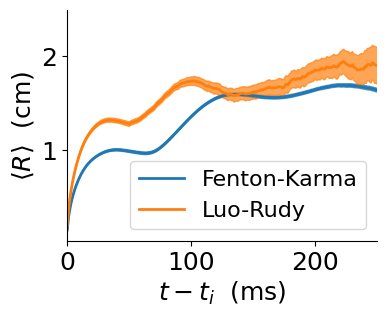

In [33]:
fig,ax=plt.subplots(figsize=(4,3))

df_R = df_R_fk
# df_R = df_R_lr
t_values = df_R['t'].values
R_values = df_R['meanR'].values
Delta_R_values = df_R['Delta_meanR'].values
ax.plot(t_values,R_values,color='C0',label='Fenton-Karma',lw=2)
ax.fill_between(t_values,R_values-Delta_R_values,R_values+Delta_R_values,color='C0',alpha=0.7)

# df_R = df_R_fk
df_R = df_R_lr
t_values = df_R['t'].values
R_values = df_R['meanR'].values
Delta_R_values = df_R['Delta_meanR'].values
ax.plot(t_values,R_values,color='C1',label='Luo-Rudy',lw=2)
ax.fill_between(t_values,R_values-Delta_R_values,R_values+Delta_R_values,color='C1',alpha=0.7)


# format_plot
format_plot(ax=ax,xlabel=r'$t-t_i$  (ms)',ylabel=r'$\langle R\rangle$  (cm)',fontsize=18)
spines = ax.spines[['right','top']].set_visible(False)
ax.legend(fontsize=16)
ax.set_xlim([0,250])
plt.show()

at first datum, dRdt = 0.1317 ± 0.0046 cm/ms (FK)
at first datum, dRdt = 0.1682 ± 0.0082 cm/ms (LR)


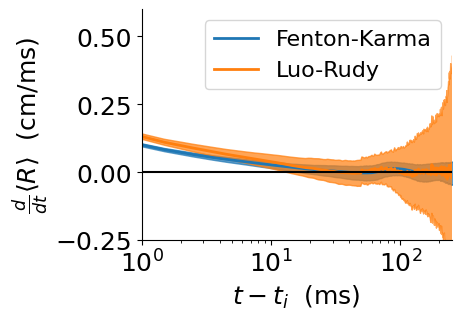

In [34]:
fig,ax=plt.subplots(figsize=(4,3))

df_R = df_R_fk
# df_R = df_R_lr
t_values = df_R['t'].values
R_values = df_R['meanR'].values
Delta_R_values = df_R['Delta_meanR'].values
dRdt_values = np.diff(R_values) / np.diff(t_values)
tt_values = moving_average(t_values,2)
Delta_dRdt_values = moving_average(Delta_R_values,2)*2
# Delta_dRdt_values = moving_average(Delta_R_values,2)
ax.plot(tt_values,dRdt_values,color='C0',label='Fenton-Karma',lw=2)
ax.fill_between(tt_values,dRdt_values-Delta_dRdt_values,dRdt_values+Delta_dRdt_values,color='C0',alpha=0.7)
print(f"at first datum, dRdt = {dRdt_values[0]:.4f} ± {Delta_dRdt_values[0]:.4f} cm/ms (FK)")

# df_R = df_R_fk
df_R = df_R_lr
t_values = df_R['t'].values
R_values = df_R['meanR'].values
Delta_R_values = df_R['Delta_meanR'].values
dRdt_values = np.diff(R_values) / np.diff(t_values)
tt_values = moving_average(t_values,2)
Delta_dRdt_values = moving_average(Delta_R_values,2)*2
# Delta_dRdt_values = moving_average(Delta_R_values,2)
ax.plot(tt_values,dRdt_values,color='C1',label='Luo-Rudy',lw=2)
ax.fill_between(tt_values,dRdt_values-Delta_dRdt_values,dRdt_values+Delta_dRdt_values,color='C1',alpha=0.7)
print(f"at first datum, dRdt = {dRdt_values[0]:.4f} ± {Delta_dRdt_values[0]:.4f} cm/ms (LR)")

# format_plot
# xlim = [0,250]
xlim = [1,250]
ax.plot(xlim,[0,0],'k-')
format_plot(ax=ax,xlabel=r'$t-t_i$  (ms)',ylabel=r'$\frac{d}{dt}\langle R\rangle$  (cm/ms)',fontsize=18)
spines = ax.spines[['right','top']].set_visible(False)
ax.legend(fontsize=16)
ax.set_xlim(xlim)
ax.set_ylim([-0.25,0.6])
ax.set_xscale('log')
plt.show()

In [35]:
beep(3)

-n 
-n 
-n 


0

# TODO: load annihilation ranges and average timeseries as before

In [63]:
# load creation ranges and average conditioned on time after annihilation

# range_data_dir_fk = "/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_creation_range_timeseries.pkl"
range_data_dir_fk = "/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_annihilation_range_timeseries.pkl"
#LR 200x200
# range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/tippos_per_001_creation_range_timeseries.pkl'
# range_data_dir_lr='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_creation_range_timeseries.pkl'
range_data_dir_lr='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_annihilation_range_timeseries.pkl'
os.path.exists(range_data_dir_fk),os.path.exists(range_data_dir_lr)

(True, True)

In [64]:
data = load_from_pickle(range_data_dir_lr)
min_samples=10
# min_samples=100
mintmax=1.
# mintmax=4.
# mintmax=100.
# mintmax=200.  #looks sharper for lr
mintmax=50.  #looks sharper for lr
printing=True
tR_values_lst=[]
dict_lst=[]
nsteps=len(data)
for trial_num in range(nsteps):
    df = data[trial_num]#.rename(columns={#'annihilation_index':'creation_index',
#                             'tdeath':'tbirth'})
    if df.shape[0]>0:
        groups = df.groupby(by='annihilation_index')
        for creation_index,g in groups:
            r0 = g.iloc[0]['R']
            n_prev = int(g.iloc[0]['n']) - 2
            tR_values = g[['tdeath','R',]].values
            tmax = tR_values[:,0].max()
            if tmax >= mintmax:
                #record
                tR_values_lst.append(pd.DataFrame(tR_values).rename(columns={0:'t',1:'R'}))
                dict_lst.append(dict(
                    trial_num=trial_num,
                    creation_index=creation_index,
                    r0=r0,
                    n_prev=n_prev,
                ))
        if printing:
            printProgressBar(trial_num+1,nsteps)
if printing:
    printProgressBar(nsteps,nsteps)

df_r0_lr_annihil = pd.DataFrame(dict_lst)

# df_r0['r0'].mean(),df_r0.shape[0]
dict_lst=[]
for t,gR in pd.concat(tR_values_lst).groupby(by='t'):
    R_values = gR['R'].values
    if R_values.shape[0]>=min_samples:
        meanR,Delta_meanR,num_obs,p_normal=comp_mean_bootstrap_uncertainty(R_values,num_samples=1000)
        #record
        dict_lst.append(dict(t=t,meanR=meanR,Delta_meanR=Delta_meanR,p_normal=p_normal,num_obs=num_obs))
df_R_lr_annihil = pd.DataFrame(dict_lst)

data = load_from_pickle(range_data_dir_fk)
min_samples=100
mintmax=4.
# mintmax=100.
mintmax=200.  #looks sharper for lr
printing=True
tR_values_lst=[]
dict_lst=[]
nsteps=len(data)
for trial_num in range(nsteps):
    df = data[trial_num]#.rename(columns={#'annihilation_index':'creation_index',
#                             'tdeath':'tbirth'})
    if df.shape[0]>0:
        groups = df.groupby(by='annihilation_index')
        for creation_index,g in groups:
            r0 = g.iloc[0]['R']
            n_prev = int(g.iloc[0]['n']) - 2
            tR_values = g[['tdeath','R',]].values
            tmax = tR_values[:,0].max()
            if tmax >= mintmax:
                #record
                tR_values_lst.append(pd.DataFrame(tR_values).rename(columns={0:'t',1:'R'}))
                dict_lst.append(dict(
                    trial_num=trial_num,
                    creation_index=creation_index,
                    r0=r0,
                    n_prev=n_prev,
                ))
        if printing:
            printProgressBar(trial_num+1,nsteps)
if printing:
    printProgressBar(nsteps,nsteps)

df_r0_fk_annihil = pd.DataFrame(dict_lst)

# df_r0['r0'].mean(),df_r0.shape[0]
dict_lst=[]
for t,gR in pd.concat(tR_values_lst).groupby(by='t'):
    R_values = gR['R'].values
    if R_values.shape[0]>=min_samples:
        meanR,Delta_meanR,num_obs,p_normal=comp_mean_bootstrap_uncertainty(R_values,num_samples=1000)
        #record
        dict_lst.append(dict(t=t,meanR=meanR,Delta_meanR=Delta_meanR,p_normal=p_normal,num_obs=num_obs))
df_R_fk_annihil = pd.DataFrame(dict_lst)

beep(3)



-n ██████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
-n 
-n 


0

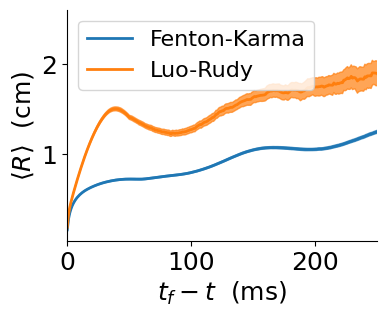

at first datum, dRdt = 0.1214 ± 0.0044 cm/ms (FK)
at first datum, dRdt = 0.1422 ± 0.0058 cm/ms (LR)


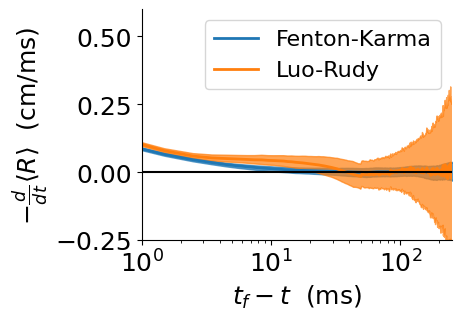

-n 
-n 
-n 


0

In [65]:
# visualize mean radial creation timeseries
fig,ax=plt.subplots(figsize=(4,3))

df_R = df_R_fk_annihil
# df_R = df_R_lr
t_values = df_R['t'].values
R_values = df_R['meanR'].values
Delta_R_values = df_R['Delta_meanR'].values
ax.plot(t_values,R_values,color='C0',label='Fenton-Karma',lw=2)
ax.fill_between(t_values,R_values-Delta_R_values,R_values+Delta_R_values,color='C0',alpha=0.7)

# df_R = df_R_fk
df_R = df_R_lr_annihil
t_values = df_R['t'].values
R_values = df_R['meanR'].values
Delta_R_values = df_R['Delta_meanR'].values
ax.plot(t_values,R_values,color='C1',label='Luo-Rudy',lw=2)
ax.fill_between(t_values,R_values-Delta_R_values,R_values+Delta_R_values,color='C1',alpha=0.7)


# format_plot
format_plot(ax=ax,xlabel=r'$t_f-t$  (ms)',ylabel=r'$\langle R\rangle$  (cm)',fontsize=18)
spines = ax.spines[['right','top']].set_visible(False)
ax.legend(fontsize=16)
ax.set_xlim([0,250])
plt.show()

fig,ax=plt.subplots(figsize=(4,3))

df_R = df_R_fk_annihil
# df_R = df_R_lr_annihil
t_values = df_R['t'].values
R_values = df_R['meanR'].values
Delta_R_values = df_R['Delta_meanR'].values
dRdt_values = np.diff(R_values) / np.diff(t_values)
tt_values = moving_average(t_values,2)
Delta_dRdt_values = moving_average(Delta_R_values,2)*2
# Delta_dRdt_values = moving_average(Delta_R_values,2)
ax.plot(tt_values,dRdt_values,color='C0',label='Fenton-Karma',lw=2)
ax.fill_between(tt_values,dRdt_values-Delta_dRdt_values,dRdt_values+Delta_dRdt_values,color='C0',alpha=0.7)
print(f"at first datum, dRdt = {dRdt_values[0]:.4f} ± {Delta_dRdt_values[0]:.4f} cm/ms (FK)")

# df_R = df_R_fk_annihil
df_R = df_R_lr_annihil
t_values = df_R['t'].values
R_values = df_R['meanR'].values
Delta_R_values = df_R['Delta_meanR'].values
dRdt_values = np.diff(R_values) / np.diff(t_values)
tt_values = moving_average(t_values,2)
Delta_dRdt_values = moving_average(Delta_R_values,2)*2
# Delta_dRdt_values = moving_average(Delta_R_values,2)
ax.plot(tt_values,dRdt_values,color='C1',label='Luo-Rudy',lw=2)
ax.fill_between(tt_values,dRdt_values-Delta_dRdt_values,dRdt_values+Delta_dRdt_values,color='C1',alpha=0.7)
print(f"at first datum, dRdt = {dRdt_values[0]:.4f} ± {Delta_dRdt_values[0]:.4f} cm/ms (LR)")

# format_plot
# xlim = [0,250]
xlim = [1,250]
ax.plot(xlim,[0,0],'k-')
format_plot(ax=ax,xlabel=r'$t_f-t$  (ms)',ylabel=r'$-\frac{d}{dt}\langle R\rangle$  (cm/ms)',fontsize=18)
spines = ax.spines[['right','top']].set_visible(False)
ax.legend(fontsize=16)
ax.set_xlim(xlim)
ax.set_ylim([-0.25,0.6])
ax.set_xscale('log')
plt.show()

beep(3)

# TODO: plot dRdt vs 1/R for creation and annihilation pairs, as before
TODO: make an abbreviated legend inside the axis

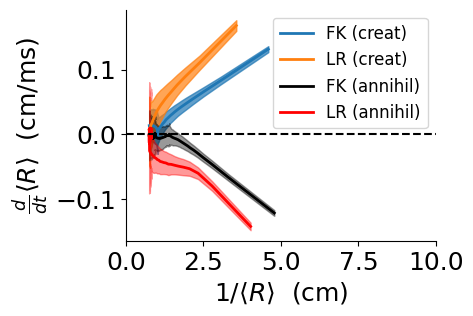

-n 
-n 
-n 


0

In [67]:
fig,ax=plt.subplots(figsize=(4,3))
df_R = df_R_fk
# df_R = df_R_lr
t_values = df_R['t'].values
R_values = df_R['meanR'].values
Delta_R_values = df_R['Delta_meanR'].values
dRdt_values = np.diff(R_values) / np.diff(t_values)
tt_values = moving_average(t_values,2)
Delta_dRdt_values = moving_average(Delta_R_values,2)*2
# Delta_dRdt_values = moving_average(Delta_R_values,2)
x_values = 1/moving_average(R_values,2)
boo = x_values>1/1.33
ax.plot(x_values[boo],dRdt_values[boo],
                color='C0',label='FK (creat)',lw=2)
ax.fill_between(x_values[boo],dRdt_values[boo]-Delta_dRdt_values[boo],dRdt_values[boo]+Delta_dRdt_values[boo],
                color='C0',alpha=0.7)

# df_R = df_R_fk
df_R = df_R_lr
t_values = df_R['t'].values
R_values = df_R['meanR'].values
Delta_R_values = df_R['Delta_meanR'].values
dRdt_values = np.diff(R_values) / np.diff(t_values)
tt_values = moving_average(t_values,2)
Delta_dRdt_values = moving_average(Delta_R_values,2)*2
# Delta_dRdt_values = moving_average(Delta_R_values,2)
x_values = 1/moving_average(R_values,2)
boo = x_values>1/1.33
ax.plot(x_values[boo],dRdt_values[boo],
                color='C1',label='LR (creat)',lw=2)
ax.fill_between(x_values[boo],dRdt_values[boo]-Delta_dRdt_values[boo],dRdt_values[boo]+Delta_dRdt_values[boo],
                color='C1',alpha=0.7)

df_R = df_R_fk_annihil
# df_R = df_R_lr_annihil
t_values = df_R['t'].values
R_values = df_R['meanR'].values
Delta_R_values = df_R['Delta_meanR'].values
dRdt_values = np.diff(R_values) / np.diff(t_values)
tt_values = moving_average(t_values,2)
Delta_dRdt_values = moving_average(Delta_R_values,2)*2
# Delta_dRdt_values = moving_average(Delta_R_values,2)
x_values = 1/moving_average(R_values,2)
boo = x_values>1/1.33
ax.plot(x_values[boo],-dRdt_values[boo],
                color='k',label='FK (annihil)',lw=2)
ax.fill_between(x_values[boo],-dRdt_values[boo]-Delta_dRdt_values[boo],-dRdt_values[boo]+Delta_dRdt_values[boo],
                color='k',alpha=0.4)

# df_R = df_R_fk_annihil
df_R = df_R_lr_annihil
t_values = df_R['t'].values
R_values = df_R['meanR'].values
Delta_R_values = df_R['Delta_meanR'].values
dRdt_values = np.diff(R_values) / np.diff(t_values)
tt_values = moving_average(t_values,2)
Delta_dRdt_values = moving_average(Delta_R_values,2)*2
# Delta_dRdt_values = moving_average(Delta_R_values,2)
x_values = 1/moving_average(R_values,2)
boo = x_values>1/1.33
ax.plot(x_values[boo],-dRdt_values[boo],
                color='r',label='LR (annihil)',lw=2)
ax.fill_between(x_values[boo],-dRdt_values[boo]-Delta_dRdt_values[boo],-dRdt_values[boo]+Delta_dRdt_values[boo],
                color='r',alpha=0.4)



# format_plot
xlim = [0,10]
# xlim = [1,250]
ax.plot(xlim,[0,0],'k--')
format_plot(ax=ax,xlabel=r'$1/\langle R\rangle$  (cm)',ylabel=r'$\frac{d}{dt}\langle R\rangle$  (cm/ms)',fontsize=18)
spines = ax.spines[['right','top']].set_visible(False)
ax.legend(fontsize=12)
ax.set_xlim(xlim)
# ax.set_ylim([-0.25,0.6])
# ax.set_xscale('log')
plt.show()

beep(3)

# answer questions from the text

In [68]:
num_obs_fk = df_R_fk['num_obs'].max()
num_obs_lr = df_R_lr['num_obs'].max()
num_obs_fk_annihil = df_R_fk_annihil['num_obs'].max()
num_obs_lr_annihil = df_R_lr_annihil['num_obs'].max()
print(f"{num_obs_fk=}")
print(f"{num_obs_lr=}")
print(f"{num_obs_fk_annihil=}")
print(f"{num_obs_lr_annihil=}")

num_obs_fk=5517
num_obs_lr=2717
num_obs_fk_annihil=5397
num_obs_lr_annihil=3473


In [66]:
#heretim
#ROOT CAUSE ANALYSIS
#HYPOTHESIS: df_R_lr == df_R_lr_annihil
#Q: why is creation and annihilation the same on average to machine precision?
#Q: why does df_R_lr and df_R_lr_annihil have the same num_obs?
# df_R_lr - df_R_lr_annihil